In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import torch
import lineagevi

In [ ]:
adata_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.09.12_13.51.28/adata_with_velocity.h5ad'
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.09.12_13.51.28/vae_velocity_model.pt'

adata = sc.read_h5ad(adata_path)

model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/vae_velocity_model.pt'

linvi = lineagevi.utils.load_model(
    adata,
    model_path=model_path,
    map_location='cpu',
    n_hidden=128,
    training=False
)

LineageVIModel(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=1805, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (mean_layer): Linear(in_features=128, out_features=647, bias=True)
    (logvar_layer): Linear(in_features=128, out_features=647, bias=True)
  )
  (gene_decoder): MaskedLinearDecoder(
    (linear): Linear(in_features=647, out_features=1805, bias=True)
  )
  (velocity_decoder): VelocityDecoder(
    (shared_decoder): Sequential(
      (0): Linear(in_features=647, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (gp_velocity_decoder): Linear(in_features=128, out_features=647, bias=True)
    (gene_velocity_decoder): Sequential(
      (0): Linear(in_features=128, out_features=5415, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
    )
  )
)

In [4]:
outs = linvi.get_model_outputs(
        adata,
        n_samples=2,
        return_mean=False,
        return_negative_velo=True,
        base_seed=123,
        save_to_adata=False
    )

for k,v in outs.items():
    print(f'{k}:  {v.shape}')

recon:  (2, 3696, 1805)
z:  (2, 3696, 647)
mean:  (2, 3696, 647)
logvar:  (2, 3696, 647)
velocity_u:  (2, 3696, 1805)
velocity:  (2, 3696, 1805)
velocity_gp:  (2, 3696, 647)
alpha:  (2, 3696, 1805)
beta:  (2, 3696, 1805)
gamma:  (2, 3696, 1805)


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_ut

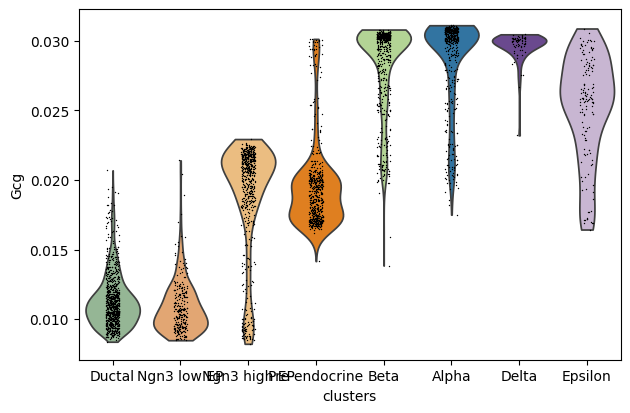

In [5]:
sc.pl.violin(adata, keys='Gcg', layer='alpha', groupby='clusters')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.0min


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.2min finished


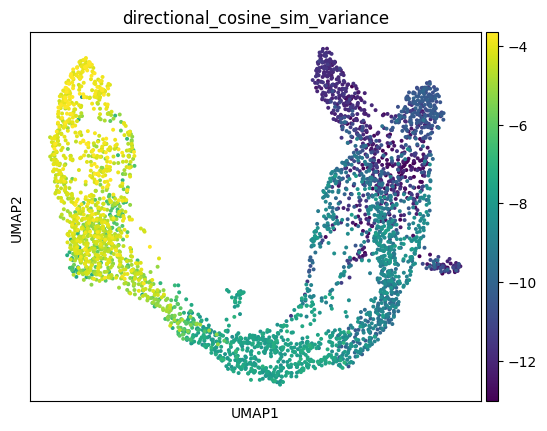

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA              0.000010                0.008679   
 AAACCTGAGCCTTGAT              0.000634                0.077396   
 AAACCTGAGGCAATTA              0.000021                0.013764   
 AAACCTGCATCATCCC              0.004909                0.211524   
 AAACCTGGTAAGTGGC              0.000041                0.018069   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA              0.000009                0.009780   
 TTTGTCAAGTGTGGCA              0.000051                0.018258   
 TTTGTCAGTTGTTTGG              0.005324                0.199726   
 TTTGTCATCGAATGCT              0.000004                0.005835   
 TTTGTCATCTGTTTGT              0.000012                0.010489   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [6]:
linvi.get_directional_uncertainty(
    adata,
    use_gp_velo = False,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   25.7s


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   31.2s finished


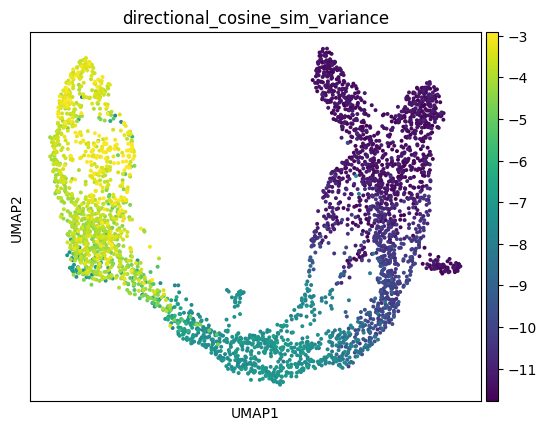

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA          6.465475e-07                0.002426   
 AAACCTGAGCCTTGAT          2.855058e-03                0.149263   
 AAACCTGAGGCAATTA          9.971121e-07                0.003381   
 AAACCTGCATCATCCC          7.183775e-03                0.238473   
 AAACCTGGTAAGTGGC          6.301213e-05                0.023825   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA          2.995741e-05                0.015689   
 TTTGTCAAGTGTGGCA          4.308378e-05                0.020990   
 TTTGTCAGTTGTTTGG          5.644603e-03                0.203544   
 TTTGTCATCGAATGCT          3.690679e-07                0.001932   
 TTTGTCATCTGTTTGT          7.885473e-07                0.002609   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [7]:
linvi.get_directional_uncertainty(
    adata,
    use_gp_velo = True,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   34.4s finished


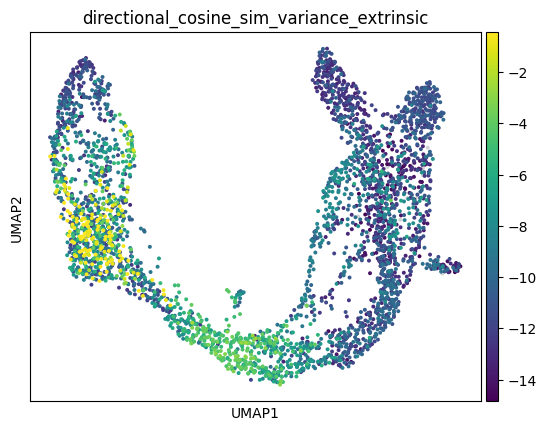

In [8]:
df = linvi.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=False,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   30.9s finished


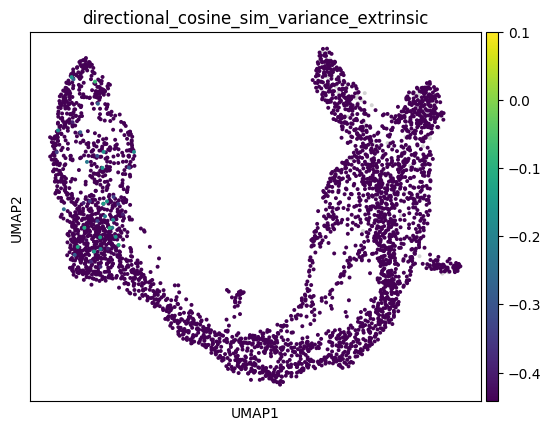

In [9]:
df = linvi.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=True,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)